Quick Info on the dataset: The custom made Dataset consists of 6,000+ image of resumes and non-resume images.

# 1. Importing Libraries

In [1]:
# Import necessary libraries and components
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory

For reproducibility

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define constants
batch_size = 32
img_height = 150
img_width = 150


# 2. Loading the Dataset and Train - Test Split

In [4]:
# Load data using TensorFlow's image_dataset_from_directory
data_dir = '/content/drive/MyDrive/data_'
train_data = image_dataset_from_directory(data_dir,
                                          image_size=(img_height, img_width),
                                          validation_split=0.2,
                                          subset='training',
                                          seed=42,
                                          batch_size=batch_size)
val_data = image_dataset_from_directory(data_dir,
                                        image_size=(img_height, img_width),
                                        validation_split=0.2,
                                        subset='validation',
                                        seed=42,
                                        batch_size=batch_size)

Found 6108 files belonging to 2 classes.
Using 4887 files for training.
Found 6108 files belonging to 2 classes.
Using 1221 files for validation.


# 3. Visualizing the Dataset

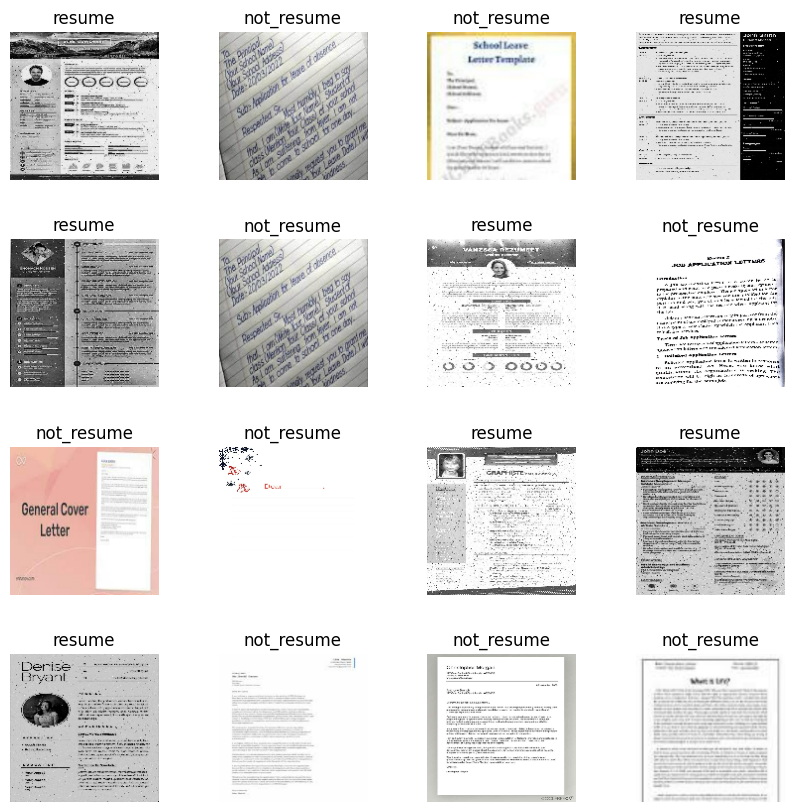

In [13]:
# Assuming you already have 'train' dataset defined

# Create a data iterator
data_iterator = train_data.as_numpy_iterator()

# Get a batch from the iterator
batch = next(data_iterator)

# Assuming label_to_class_name is defined earlier in your code
label_to_class_name = dict(zip(range(len(train_data.class_names)), train_data.class_names))

# Create subplots for visualization
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

# Iterate through the batch and display images with labels
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))

        # Convert label index to class name using label_to_class_name dictionary
        class_name = label_to_class_name[int(batch[1][index])]

        ax[i, j].set_title(class_name)
        ax[i, j].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


# 4. Pre-Processing

In [15]:
#scaling
train_data=train_data.map(lambda x,y:(x/255,y))
val_data=val_data.map(lambda x,y:(x/255,y))

In [16]:
# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

# 5. Model Selection

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

# 6. Model Training

Epoch 1/10
153/153 [==============================] - 9s 37ms/step - loss: 0.3852 - accuracy: 0.8379 - val_loss: 0.1907 - val_accuracy: 0.9394
Epoch 2/10
153/153 [==============================] - 4s 26ms/step - loss: 0.1941 - accuracy: 0.9327 - val_loss: 0.1238 - val_accuracy: 0.9607
Epoch 3/10
153/153 [==============================] - 4s 28ms/step - loss: 0.1273 - accuracy: 0.9593 - val_loss: 0.1012 - val_accuracy: 0.9640
Epoch 4/10
153/153 [==============================] - 4s 28ms/step - loss: 0.0931 - accuracy: 0.9687 - val_loss: 0.0617 - val_accuracy: 0.9820
Epoch 5/10
153/153 [==============================] - 4s 26ms/step - loss: 0.0682 - accuracy: 0.9781 - val_loss: 0.0726 - val_accuracy: 0.9722
Epoch 6/10
153/153 [==============================] - 4s 26ms/step - loss: 0.0525 - accuracy: 0.9818 - val_loss: 0.0461 - val_accuracy: 0.9828
Epoch 7/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0510 - accuracy: 0.9838 - val_loss: 0.0432 - val_accuracy: 0.9844

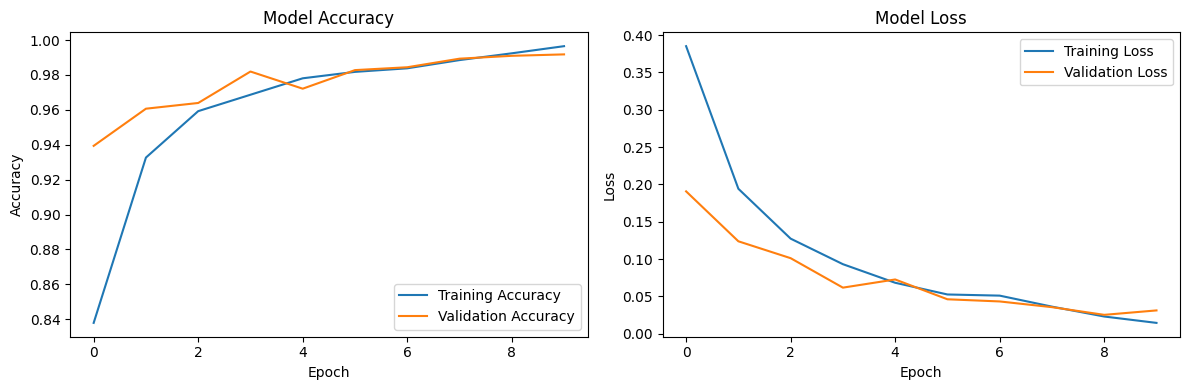

In [19]:
# Define a more complex model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)




# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 7. Evaluation & metrics

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Assuming you have a test dataset named 'test_data'
# and you want to test on the first 7 images
num_images_to_test = 6

for batch in test_data_iterator:
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

    # Break the loop after testing on 7 images
    if len(y_true) >= num_images_to_test:
        break

# Retrieve the final values of metrics
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

# Convert numerical labels to class names for better interpretation
y_true_class_names = [label_to_class_name[label] for label in y_true]
y_pred_class_names = [label_to_class_name[int(pred > 0.5)] for pred in y_pred]

# Calculate F1-score
def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        return 0  # To handle the case where both precision and recall are 0
    return 2 * (precision * recall) / (precision + recall)

f1_score = calculate_f1_score(precision, recall)

# Print metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Print class names of the first 7 predictions
print(f'True Class Names: {y_true_class_names[:num_images_to_test]}')
print(f'Predicted Class Names: {y_pred_class_names[:num_images_to_test]}')


1/1 [==============================] - 0s 22ms/step
Precision: 0.8333
Recall: 0.8333
Accuracy: 0.8125
F1 Score: 0.8333
True Class Names: ['resume', 'resume', 'resume', 'resume', 'not_resume', 'not_resume']
Predicted Class Names: ['resume', 'resume', 'resume', 'not_resume', 'not_resume', 'not_resume']


In [61]:
import csv
import os

# Specify the file path to save the metrics CSV file
metrics_file_path = '/content/drive/MyDrive/data_/metrics.csv'

# Check if the file exists or create a new one
file_exists = os.path.exists(metrics_file_path)

with open(metrics_file_path, 'a', newline='') as file:
    fieldnames = ['Metric', 'Value']

    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write header if the file is newly created
    if not file_exists:
        writer.writeheader()

    # Write metrics
    writer.writerow({'Metric': 'Accuracy', 'Value': accuracy})
    writer.writerow({'Metric': 'Precision', 'Value': precision})
    writer.writerow({'Metric': 'Recall', 'Value': recall})
    writer.writerow({'Metric': 'F1-Score', 'Value': f1_score})

print(f'Metrics saved to {metrics_file_path}')


Metrics saved to /content/drive/MyDrive/data_/metrics.csv


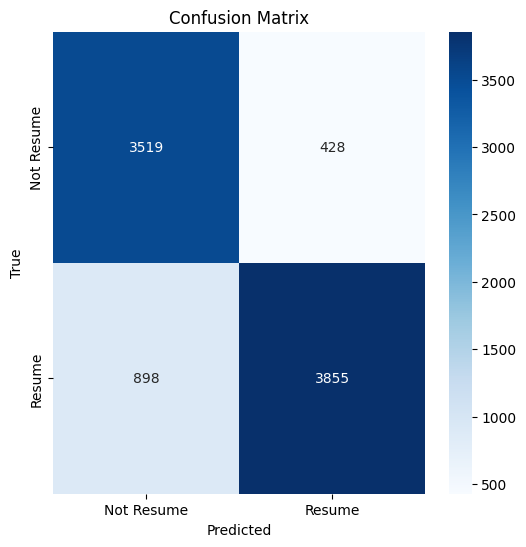

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have a test dataset named 'test_data'
# and you have already calculated y_true and y_pred

# Convert to binary predictions (assuming threshold is 0.5)
y_pred_binary = np.array(y_pred) > 0.5

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Visualize confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Resume", "Resume"], yticklabels=["Not Resume", "Resume"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 8. Testing


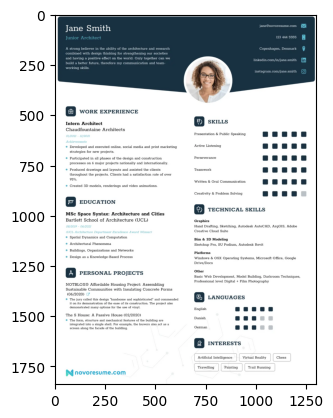

1/1 [==============================] - 0s 17ms/step
[[1.]]
Actual Result: This is a Resume
Predicted Result: This is a Resume


In [24]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load the image
img_path = '/content/resume-example (1).png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.imshow(img)
plt.show()

# Resize the image using TensorFlow
resize = tf.image.resize(np.expand_dims(img/255, 0), (150, 150))

# Make predictions using the model
yhat = model.predict(resize)

print(yhat)
print('Actual Result: This is a Resume')

# Assuming 'yhat' is a probability and not a binary prediction
if yhat > 0.5:
    print(f'Predicted Result: This is a Resume')
else:
    print(f'Predicted Result: This is not a Resume')


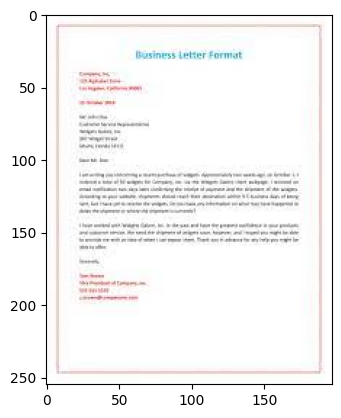

1/1 [==============================] - 0s 18ms/step
[[2.8246302e-05]]
Actual Result: This is  not a Resume
Predicted Result: This is not a Resume


In [25]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load the image
img_path = '/content/download (1).jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.imshow(img)
plt.show()

# Resize the image using TensorFlow
resize = tf.image.resize(np.expand_dims(img/255, 0), (150, 150))

# Make predictions using the model
yhat = model.predict(resize)

print(yhat)
print('Actual Result: This is  not a Resume')

# Assuming 'yhat' is a probability and not a binary prediction
if yhat > 0.5:
    print(f'Predicted Result: This is a Resume')
else:
    print(f'Predicted Result: This is not a Resume')
